In [1]:
import os
import json
import torch
import random
import pickle
import numpy as np
from evaluation import *
from functions import *
import torch.optim as optim
from torch.utils.data import TensorDataset
from Models.AutoEncoder import AutoEncoder
from Models.AutoEncoderEx import AutoEncoderEx
from Models.UNet import UNet
from matplotlib import pyplot as plt
from thop import profile
from thop import clever_format
import time

In [2]:
device = "cpu"
samples = 100
iterations = 10
x = pickle.load(open("./BestRun/xData.pkl", "rb"))
y = pickle.load(open("./BestRun/yData.pkl", "rb"))
x = torch.FloatTensor(x).to(device)
y = torch.FloatTensor(y).to(device)
print(x.shape, y.shape)

torch.Size([981, 3, 172, 79]) torch.Size([981, 3, 172, 79])


In [3]:
model = torch.load("./BestRun/modelNew").to(device)
print(model)

UNetEx(
  (encoder): Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
      (2): Sequential(
        (0): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
    )
    (1): Sequential(
      (0): Sequential(
        (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
      (2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
      )
    )
    (2): Sequential(
      (0): Sequential(
        (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU

In [4]:
def visualize(sample_y, out_y, s):
    error = torch.abs(sample_y - out_y)
    sample_y = sample_y.detach().cpu().numpy()
    out_y = out_y.detach().cpu().numpy()
    error = error.detach().cpu().numpy()
    
    minu = np.min(sample_y[s, 0, :, :])
    maxu = np.max(sample_y[s, 0, :, :])

    minv = np.min(sample_y[s, 1, :, :])
    maxv = np.max(sample_y[s, 1, :, :])

    minp = np.min(sample_y[s, 2, :, :])
    maxp = np.max(sample_y[s, 2, :, :])

    mineu = np.min(error[s, 0, :, :])
    maxeu = np.max(error[s, 0, :, :])

    minev = np.min(error[s, 1, :, :])
    maxev = np.max(error[s, 1, :, :])

    minep = np.min(error[s, 2, :, :])
    maxep = np.max(error[s, 2, :, :])

    f = 0.8

    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.subplot(3, 3, 1)
    plt.title('CFD', fontsize=18)
    plt.imshow(np.transpose(sample_y[s, 0, :, :]), cmap='jet', vmin = minu, vmax = maxu)
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Ux', fontsize=18)
    plt.subplot(3, 3, 2)
    plt.title('CNN', fontsize=18)
    plt.imshow(np.transpose(out_y[s, 0, :, :]), cmap='jet', vmin = minu, vmax = maxu)
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 3)
    plt.title('Error', fontsize=18)
    plt.imshow(np.transpose(error[s, 0, :, :]), cmap='jet', vmin = mineu, vmax = f*maxeu)
    plt.colorbar(orientation='horizontal')

    plt.subplot(3, 3, 4)
    plt.imshow(np.transpose(sample_y[s, 1, :, :]), cmap='jet', vmin = minv, vmax = maxv)
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Uy', fontsize=18)
    plt.subplot(3, 3, 5)
    plt.imshow(np.transpose(out_y[s, 1, :, :]), cmap='jet', vmin = minv, vmax = maxv)
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 6)
    plt.imshow(np.transpose(error[s, 1, :, :]), cmap='jet', vmin = minev, vmax = f*maxev)
    plt.colorbar(orientation='horizontal')

    plt.subplot(3, 3, 7)
    plt.imshow(np.transpose(sample_y[s, 2, :, :]), cmap='jet', vmin = minp, vmax = maxp)
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p', fontsize=18)
    plt.subplot(3, 3, 8)
    plt.imshow(np.transpose(out_y[s, 2, :, :]), cmap='jet', vmin = minp, vmax = maxp)
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 9)
    plt.imshow(np.transpose(error[s, 2, :, :]), cmap='jet', vmin = minep, vmax = f*maxep)
    plt.colorbar(orientation='horizontal')
    plt.tight_layout()
    plt.show()

Computing flops and parameters...
Register FLOP counter for module Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()
Register FLOP counter for module Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Register FLOP counter for module ReLU()


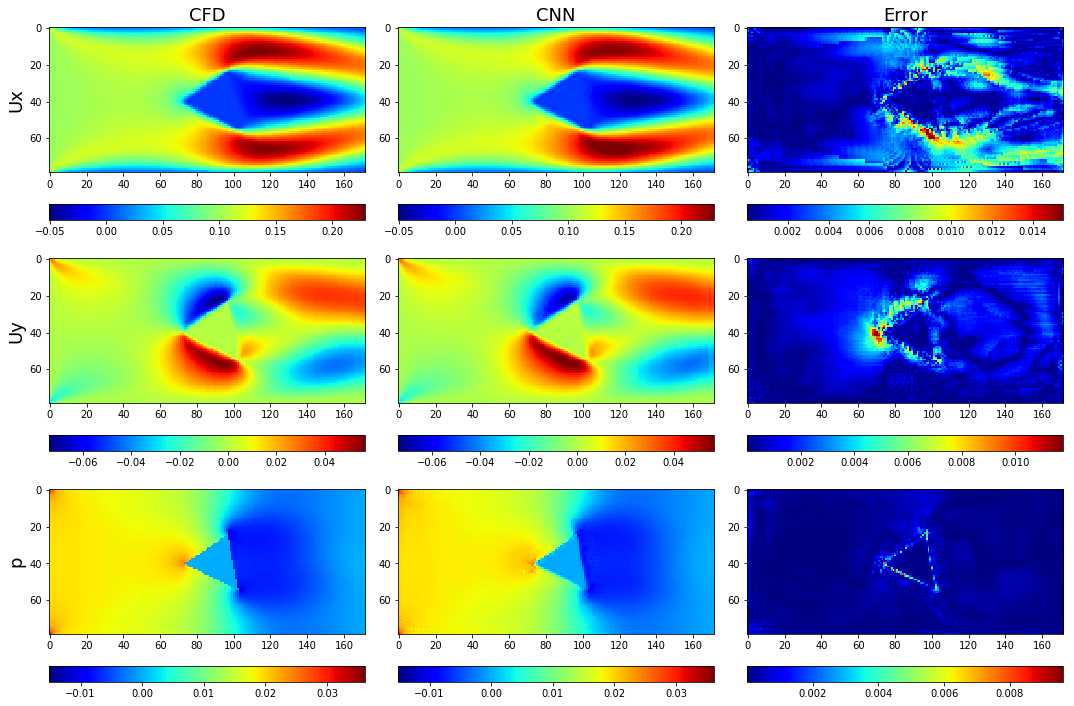

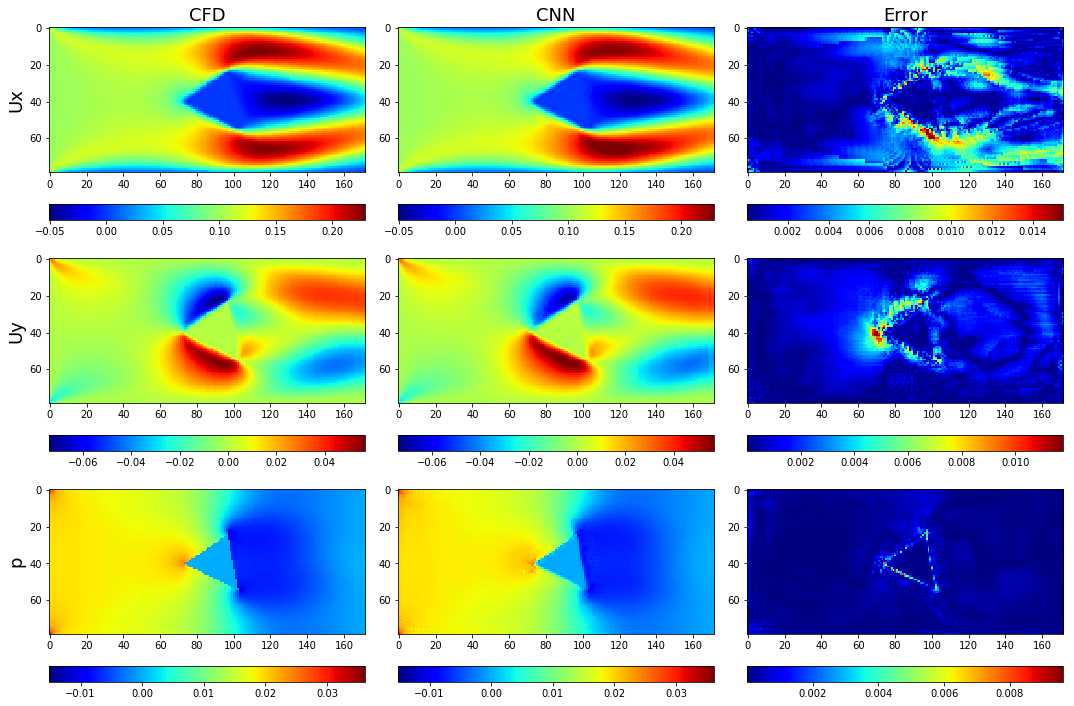

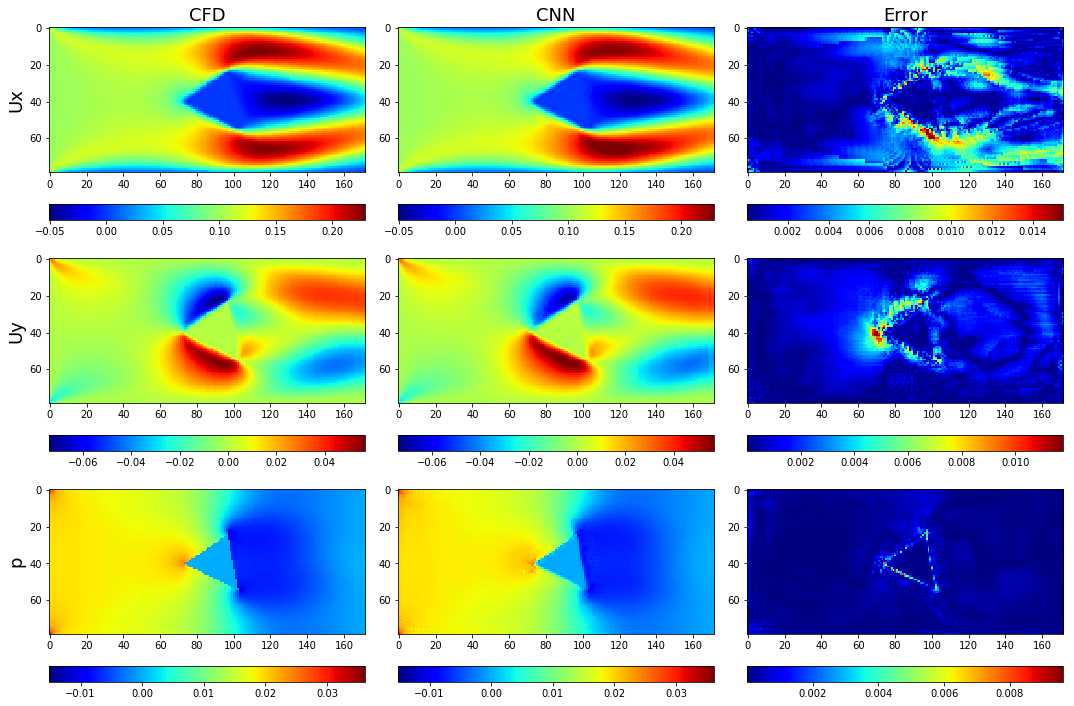

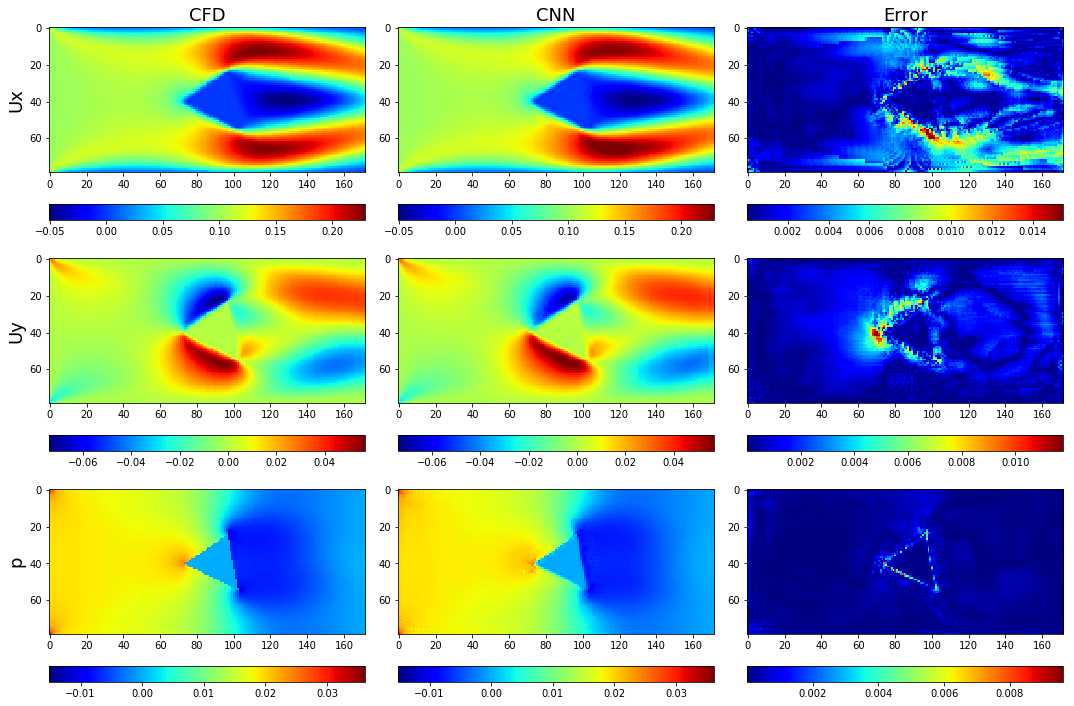

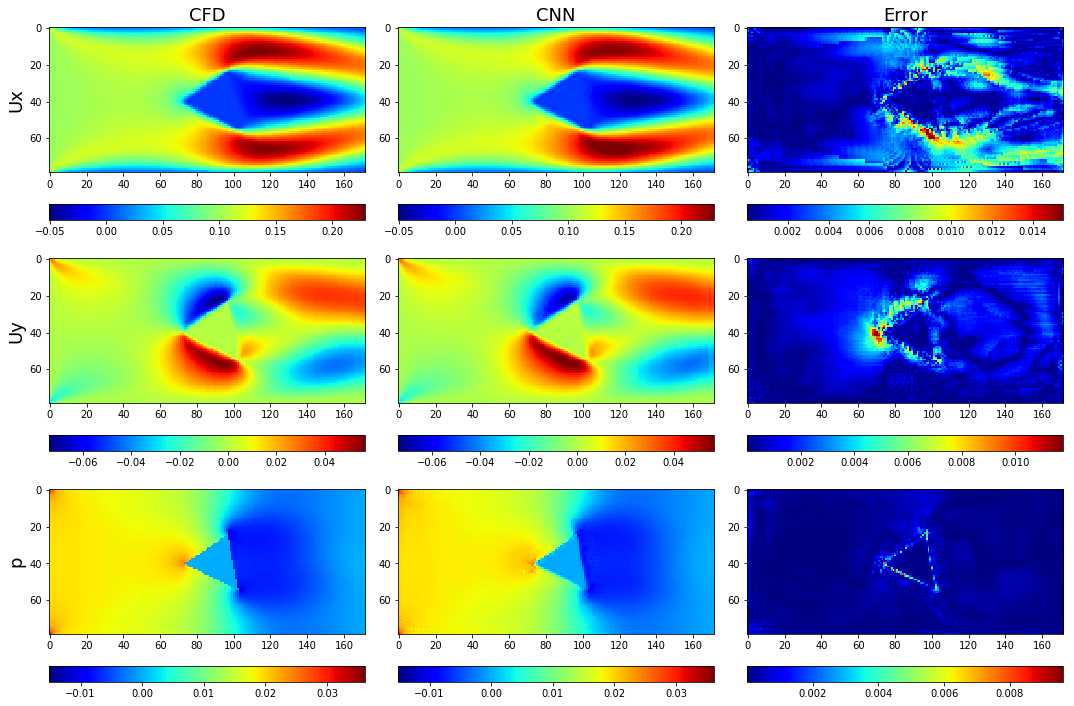

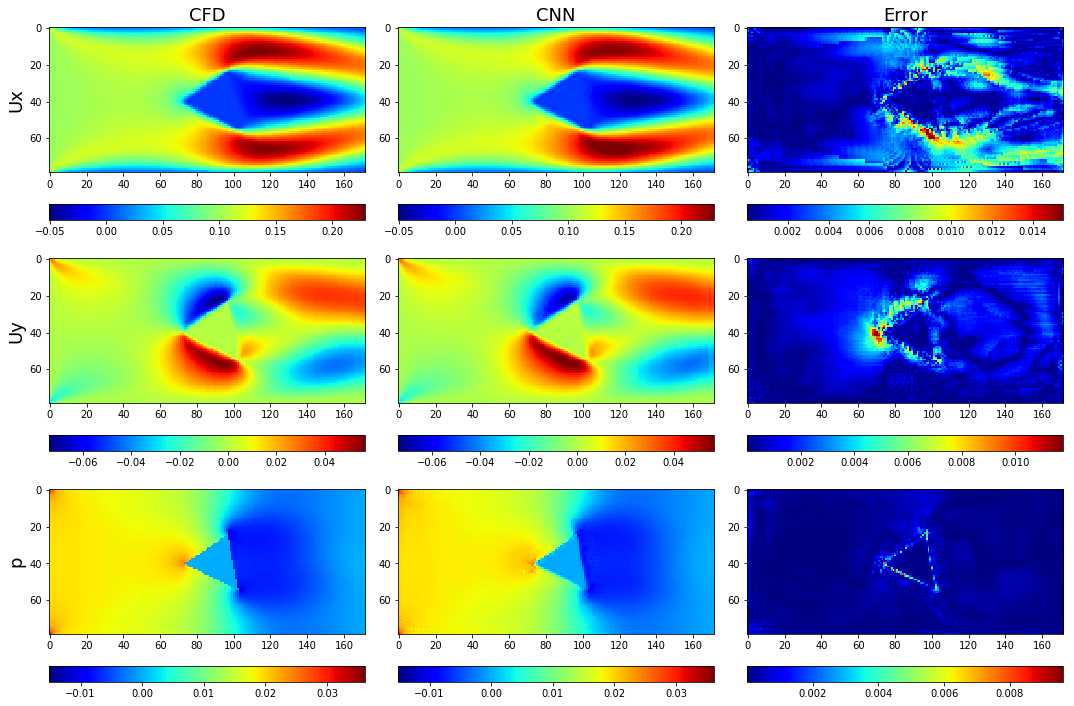

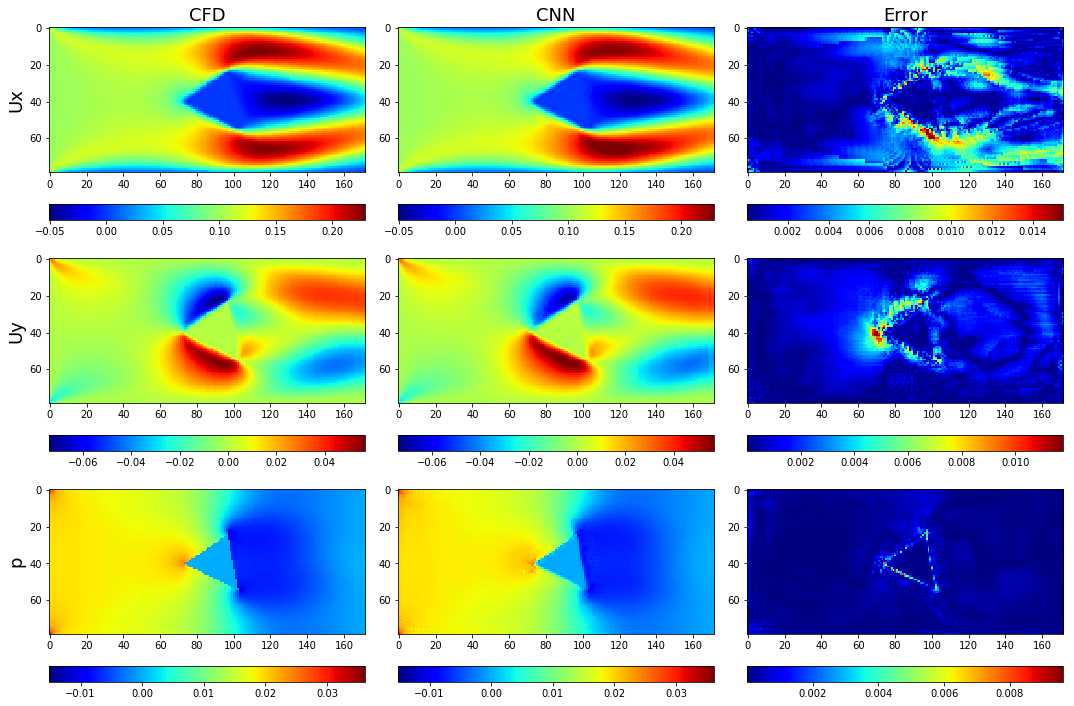

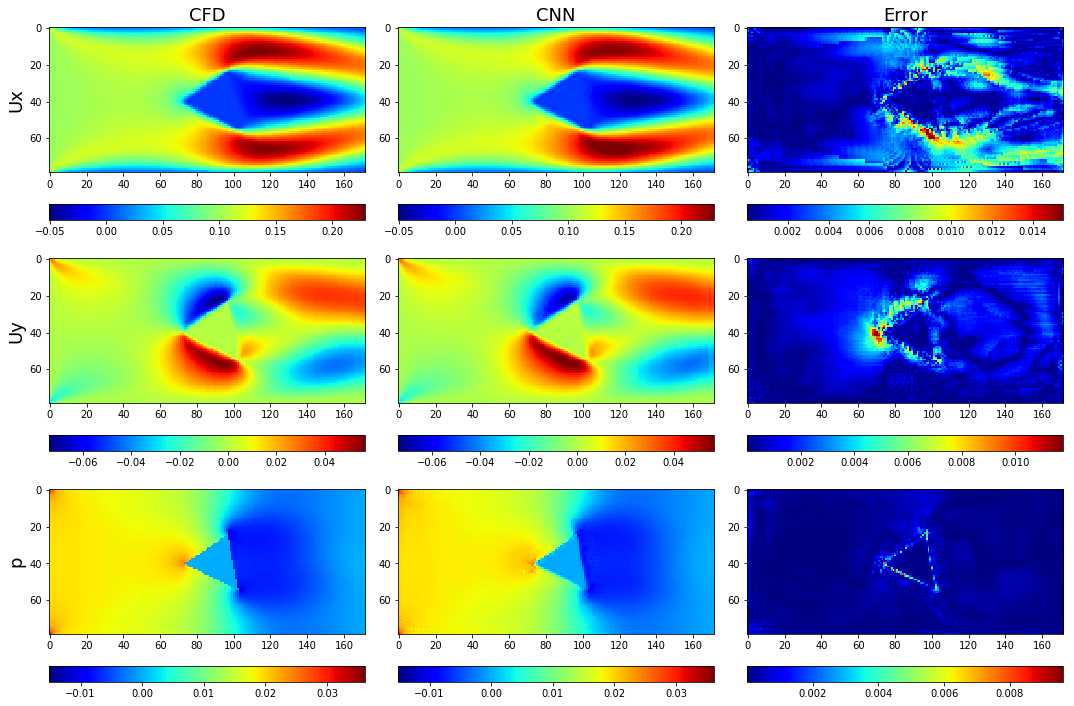

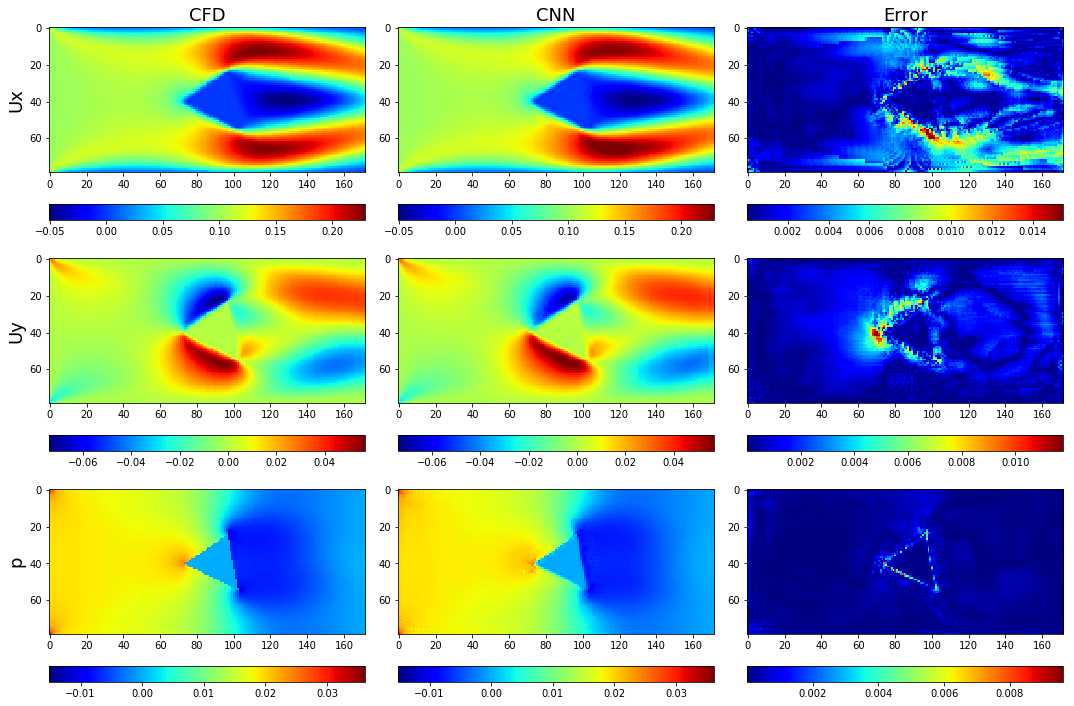

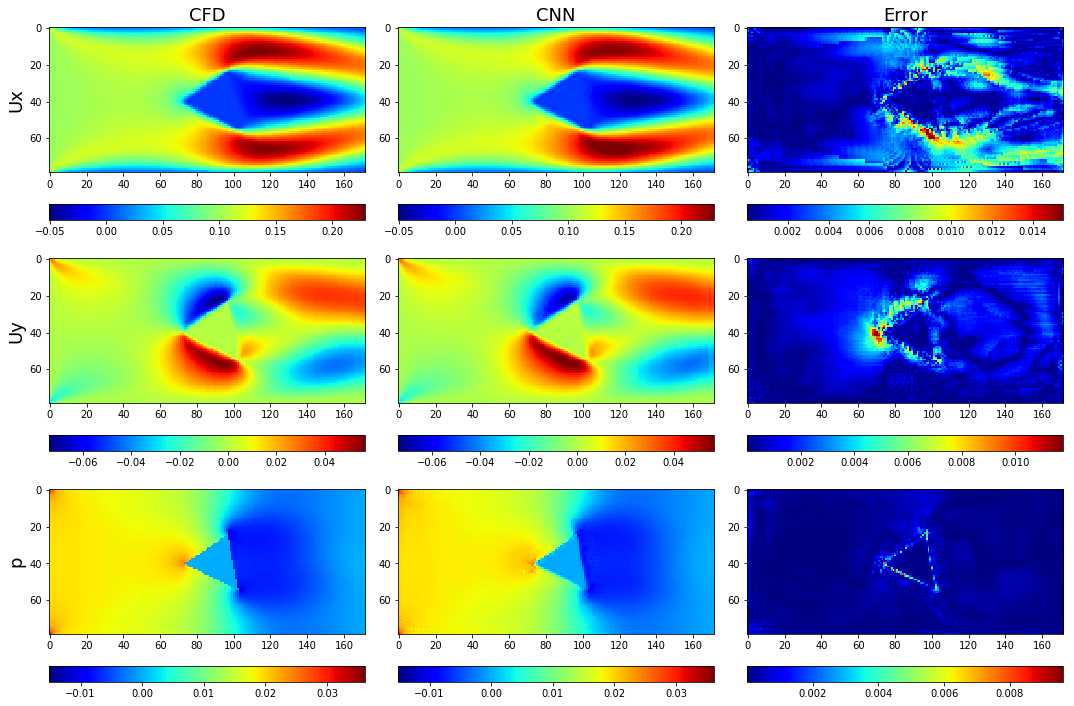

Model parameters: 819.763K
Flops: 88.091G
Average time taken: 12.01504361629486 s


In [5]:
print("Computing flops and parameters...")
input = x[:samples]
output = y[:samples]
flops, params = profile(model, inputs=(input, ))
flops, params = clever_format([flops, params], "%.3f")
print("Computing time...")
total = 0
for _ in range(iterations):
    start = time.time()
    _y = model(input)
    end = time.time()
    visualize(output, _y, 0)
    del _y
    total += end - start
total = total / iterations
print("Model parameters: " + params)
print("Flops: " + flops)
print("Average time taken: " + str(total) + " s")